<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ошибки-1-и-2-рода" data-toc-modified-id="Ошибки-1-и-2-рода-1">Ошибки 1 и 2 рода</a></span><ul class="toc-item"><li><span><a href="#Симулируем-ошибки-1-и-2-рода" data-toc-modified-id="Симулируем-ошибки-1-и-2-рода-1.1">Симулируем ошибки 1 и 2 рода</a></span></li><li><span><a href="#Ошибка-2-рода-и-число-наблюдений" data-toc-modified-id="Ошибка-2-рода-и-число-наблюдений-1.2">Ошибка 2 рода и число наблюдений</a></span></li></ul></li><li><span><a href="#О-мышах-и-людях" data-toc-modified-id="О-мышах-и-людях-2">О мышах и людях</a></span><ul class="toc-item"><li><span><a href="#Доля-и-нажатие-на-кнопку" data-toc-modified-id="Доля-и-нажатие-на-кнопку-2.1"><strong>Доля</strong> и нажатие на кнопку</a></span><ul class="toc-item"><li><span><a href="#Двусторонняя-гипотеза" data-toc-modified-id="Двусторонняя-гипотеза-2.1.1">Двусторонняя гипотеза</a></span></li><li><span><a href="#Односторонняя-гипотеза" data-toc-modified-id="Односторонняя-гипотеза-2.1.2">Односторонняя гипотеза</a></span></li></ul></li><li><span><a href="#Среднее-и-кровожадность" data-toc-modified-id="Среднее-и-кровожадность-2.2"><strong>Среднее</strong> и кровожадность</a></span><ul class="toc-item"><li><span><a href="#Асимптотический-тест" data-toc-modified-id="Асимптотический-тест-2.2.1">Асимптотический тест</a></span></li><li><span><a href="#Точный-тест" data-toc-modified-id="Точный-тест-2.2.2">Точный тест</a></span></li></ul></li><li><span><a href="#Сравниваем-кровожадность-(средние)" data-toc-modified-id="Сравниваем-кровожадность-(средние)-2.3">Сравниваем кровожадность (<strong>средние</strong>)</a></span><ul class="toc-item"><li><span><a href="#Асимптотический-тест" data-toc-modified-id="Асимптотический-тест-2.3.1">Асимптотический тест</a></span></li><li><span><a href="#Тест-Стьюдента-(неизвестные-равные-дисперсии)" data-toc-modified-id="Тест-Стьюдента-(неизвестные-равные-дисперсии)-2.3.2">Тест Стьюдента (неизвестные равные дисперсии)</a></span></li><li><span><a href="#Тест-Уэлча-(неизвестные-разные-дисперсии)" data-toc-modified-id="Тест-Уэлча-(неизвестные-разные-дисперсии)-2.3.3">Тест Уэлча (неизвестные разные дисперсии)</a></span></li></ul></li><li><span><a href="#Эмпатия-(сравниваем-дисперсии)" data-toc-modified-id="Эмпатия-(сравниваем-дисперсии)-2.4">Эмпатия (сравниваем <strong>дисперсии</strong>)</a></span></li></ul></li><li><span><a href="#Зависимые-выборки" data-toc-modified-id="Зависимые-выборки-3">Зависимые выборки</a></span><ul class="toc-item"><li><span><a href="#Реклама-(таблица-сопряженности)" data-toc-modified-id="Реклама-(таблица-сопряженности)-3.1">Реклама (таблица сопряженности)</a></span></li><li><span><a href="#Контрольная-работа-(измерения-на-одних-и-тех-же-объектах)" data-toc-modified-id="Контрольная-работа-(измерения-на-одних-и-тех-же-объектах)-3.2">Контрольная работа (измерения на одних и тех же объектах)</a></span></li></ul></li><li><span><a href="#Корреляция-Пирсона" data-toc-modified-id="Корреляция-Пирсона-4">Корреляция Пирсона</a></span><ul class="toc-item"><li><span><a href="#t-тест" data-toc-modified-id="t-тест-4.1">t-тест</a></span></li></ul></li></ul></div>

#  Ошибки 1 и 2 рода

Что мы сделаем 

- оценим ошибки первого и второго рода для теста о доле с помощью симуляций
- посмотрим на то, как можно рассчитать число наблюдений необходимое для конкретных величин ошибок

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels as sts 
from tqdm.notebook import tqdm

plt.style.use('ggplot')

## Симулируем ошибки 1 и 2 рода 

Проверка гипотезы о равенстве доли $p = p_0$  на уровне значимости $\alpha$.

$$
\begin{aligned}
&H_0: \hspace{2mm} p = 0.5 \\
&H_1: \hspace{2mm} p > 0.5 
\end{aligned}
$$

Для этого нам понадобится статистика:

$$
z=\frac{p-p_{0}}{\sqrt{\dfrac{p_{0}\left(1-p_{0}\right)}{n}}}\sim N\left(0,\ 1\right)
$$



In [2]:
def prop_asy_test(x, p0=0.5, alpha=0.05):
    p = x.mean()
    z_obs = (p - p0)/np.sqrt(p0*(1-p0)/x.size)
    pval = 1 - stats.norm.cdf(z_obs)  # p-value
    return pval

__Уровень значимости (ошибка первого рода)__ - вероятность отвергнуть гипотезу $H_0$, когда она верна. 

Попробуем с помощью симуляций вычислить её для проверки гипотезы о среднем.

Когда мы проверяем гипотезу, мы фиксируем уровень значимости. Давайте убедимся, что он действительно оказывается таким, каким мы его зафиксировали.

In [3]:
n_obs = 10**5 
res = np.zeros(n_obs)

bern_rv = stats.bernoulli(p=0.5)

for i in tqdm(range(n_obs)):
    x = bern_rv.rvs(100)
    res[i] = prop_asy_test(x)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [4]:
np.mean(res < 0.05) 

0.045

__Ошибка второго рода__ - вероятность не отвергнуть гипотезу $H_0$, когда она неверна.

Ошибку второго рода мы минимизируем по остаточному принципу. 

Давайте узнаем какого размера она в нашем эксперименте.

In [5]:
n_obs = 10**5 
res = np.zeros(n_obs)

bern_rv = stats.bernoulli(p=0.6)

for i in tqdm(range(n_obs)):
    x = bern_rv.rvs(100)
    res[i] = prop_asy_test(x)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [6]:
np.mean(res > 0.05)

0.38024

Ошибка второго рода зашкаливает. Если увеличить число наблюдений, она уменьшится. Давайте научимся подбирать число наблюдений так, чтобы ошибка второго рода была такой, какой мы хотим. 

## Ошибка 2 рода и число наблюдений

Можно вывести формулу, описывающую как ошибка второго рода зависит от числа наблюдений и ошибки первого рода. 

Давайте немного подробнее посмотрим как эти три величины зависят друг от друга. 


Для простой альтернативы $(p = p_a)$:

$$
\beta = \Phi \left( \frac{\sqrt{\frac{p_0 \cdot (1 - p_0)}{n}}}{\sqrt{\frac{p_a \cdot (1 - p_a)}{n}}} \cdot z_{1 - \alpha} +  \frac{p_0 - p_a}{\sqrt{\frac{p_a \cdot (1 - p_a)}{n}}} \right),
$$

где $\Phi(x)$ - функция распределения для $N(0,1)$. Нарисуем это.

In [7]:
alpha = np.arange(0,1,0.001)[1:]       # уровень значимости, который мы фиксируем
z_alpha = stats.norm().ppf(1 - alpha)  # разные критические значения

# наша ситуация
p0 = 0.5
pa = 0.6  # если изменить алтернативу, кривые изменятся
n = 100   # если выборка больше, гипотезы более различимы

sd0 = np.sqrt(p0*(1-p0)/n)
sda = np.sqrt(pa*(1-pa)/n)

beta = stats.norm().cdf(sd0/sda * z_alpha + (p0 - pa)/sda)

In [8]:
alpha[49], beta[49]

(0.05, 0.35850051272836425)

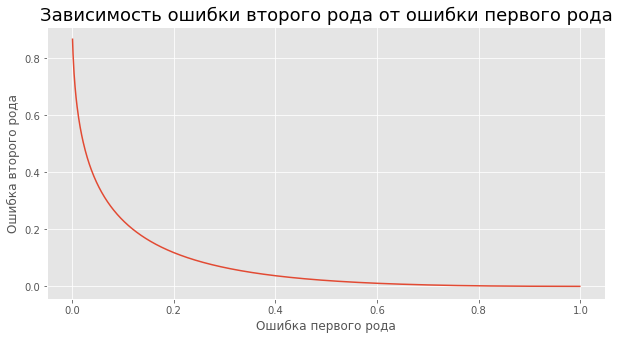

In [9]:
plt.figure(figsize = (10, 5))

plt.plot(alpha, beta)
plt.title("Зависимость ошибки второго рода от ошибки первого рода", fontsize=18)
plt.xlabel("Ошибка первого рода")
plt.ylabel("Ошибка второго рода");

Посмотрим на то как ошибки зависят друг от друга в зависимости от выбора критического значения.

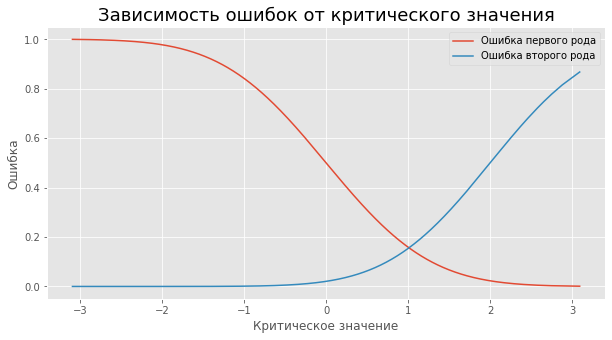

In [10]:
plt.figure(figsize = (10, 5))

plt.plot(z_alpha, alpha, label = "Ошибка первого рода")
plt.plot(z_alpha, beta, label = "Ошибка второго рода")
plt.title("Зависимость ошибок от критического значения", fontsize=18)

plt.xlabel("Критическое значение")
plt.ylabel("Ошибка")
plt.legend();

In [11]:
m = z_alpha<1.96
z_alpha[m][0], alpha[m][0], beta[m][0]

# при критическом значении 1.96 ошибка 1го рода - 0.025, а 2го рода – 0.483

(1.959963984540054, 0.025, 0.4837031204258197)

> __Выводы:__ Видно, что ошибка первого и второго рода взаимосвязаны. Чем ниже ошибка первого рода, тем выше ошибка второго рода. Чем выше критическое значение, тем ниже ошибка первого рода, но тем выще ошибка второго рода. Между этими двумя ошибками надо искать баланс. 



Посмотрим на конкретную величину $\beta$ при $\alpha = 0.05$. И наоборот. 

In [12]:
beta[alpha == 0.05]

array([0.35850051])

In [13]:
ind = np.argmin(np.abs(beta - 0.05)) # beta наиболее близкая к 5%
alpha[ind]

0.34900000000000003

Если мы увеличим количество наблюдений, ошибка второго рода уменьшится. Формула, по которой это происходит: 

$$
n = \left( \frac{\sqrt{p_0 \cdot (1 - p_0) } \cdot z_{1 - \alpha} + \sqrt{p_a \cdot (1 - p_a) } \cdot z_{1 - \beta} }{p_a - p_0}  \right)^2
$$

Напишем функцию, которая по конкретным $p_a$, $\alpha$ и $\beta$ говорит нам сколько наблюдений нужно собрать.

In [14]:
def find_n(p0, pa, alpha=0.05, beta=0.05):
    za = stats.norm().ppf(1 - alpha)
    zb = stats.norm().ppf(1 - beta)
    sn = (np.sqrt(p0*(1 - p0))* za + np.sqrt(pa*(1 - pa))* zb)/(pa - p0)
    return sn**2

In [15]:
find_n(0.5, 0.6, alpha=0.05, beta=0.05)

265.11564803989296

In [16]:
find_n(0.5, 0.6, alpha=0.01, beta=0.01)

530.3104250795232

In [17]:
find_n(0.5, 0.51, alpha=0.01, beta=0.01)

54108.11998038348

- Чем меньше ошибки 1/2 рода, тем больше наблюдений нам нужно
- Чем ниже размер эффекта, который мы хотим детектировать $p_0 - p_a$, тем больше наблюдений нам нужно

__Ситуация:__ 

Менеджер Алексей хочет проверить правда ли Джеймс Бонд отличает взболтанный мартини от смешанного. Алексей полагает, что если Бонд правда умеет различать напитки, то размер эффекта должен быть как минимум $0.2$. Алексей хотел бы получить ошибки первого и второго рода равные 1%. Сколько наблюдений ему нужно? 

In [18]:
find_n(0.5, 0.7, alpha=0.01, beta=0.01)

124.23782566566618

На практике перед запуском эксперимента обычно готовят табличку, в которой смотрят на то, сколько наблюдений понадобится для поиска эффекта разного размера при разных значениях ошибок первого и второго рода.

**Выводы**

- Ошибка 1 и 2 рода конфликтуют друг с другом. Обычно когда понижаешь одну из ошибок, растёт другая. 
- Зная как вычисляется ошибка второго рода, можно прикидывать сколько нам надо собрать наблюдений, чтобы та оказалась меньше некоторого порога.
- __Борьба за мощность:__ найти тест, обладающей наибольшей мощностью (наименьшей ошибкой второго рода) при фиксированной ошибке первого рода

#  О мышах и людях

* Возможности `scipy` для проверки гипотез смотрите [в разделе Statistical tests](https://docs.scipy.org/doc/scipy/reference/stats.html)
* Возможности `statsmodels`  [в модуле stats](https://www.statsmodels.org/0.6.1/stats.html)

> Если используете встроенные функции, внимательно читайте документацию и проверяйте как именно расчитываются параметры.

In [19]:
from scipy import stats
import statsmodels as sts 

In [20]:
def asy_mean_test(mean_hat, std_hat, mu_0=0, 
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        Асимптотический тест для равенства средних
    """
    
    z_obs = (mean_hat - mu_0)/std_hat
    
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm().cdf(np.abs(z_obs)))
        z_crit = stats.norm().ppf(1 - alpha/2)
        
        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'), 
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    if alternative == 'less':
        p_value = stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))

    if alternative == 'larger':
        p_value = 1 - stats.norm().cdf(z_obs)
        z_crit = stats.norm().ppf(1 - alpha)
        
        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    
    plt.figure(figsize = (10, 5))
    x = np.linspace(-margin, margin)
    pdf = stats.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]
    
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin, 
                 h*y_max, round(statistic, 2), color=color, fontsize=16)
        
        xq = np.linspace(left_bound, right_bound)
        yq = stats.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)
    
    return p_value



Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей. 

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$ если реальную, $2$ если на бумаге
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили несколько логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Про подобные приёмы очистки мы немного поговорим позже.  Также более подробно про исследование [можно почитать на N + 1.](https://nplus1.ru/news/2018/05/11/mice-trolley)

In [21]:
df = pd.read_csv("mouse.csv", sep="\t")
df.head()

,STUDY,AGE,GENDER,DECISION,DEO1,DEO2,DEO3,DEO4,DEO5,DEO6,...,AE,MOUSE1,MOUSE2,MOUSE3,MOUSE,DOUBT,OTHERCHOICE,UNCOMFORTABLE,NOSHOCK,RT
0,1,38,1,NaN,2,2,2,1,2,2,...,5.000000,6.0,5.0,5.0,5.333333,NaN,NaN,NaN,NaN,NaN
1,1,22,1,NaN,1,2,2,1,2,1,...,5.727273,5.0,6.0,6.0,5.666667,NaN,NaN,NaN,NaN,NaN
2,1,39,1,NaN,1,1,3,5,3,1,...,5.545455,6.0,6.0,6.0,6.000000,NaN,NaN,NaN,NaN,NaN
3,1,21,0,1.0,2,3,3,3,3,2,...,5.136364,4.0,7.0,7.0,6.000000,2.0,0.0,6.0,80.0,9.212427
4,1,20,0,1.0,4,2,2,2,2,2,...,4.181818,4.0,6.0,6.0,5.333333,4.0,0.0,6.5,75.0,17.071711


In [22]:
# удалим пропуски для тех, кто не решил дилемму
df.dropna(subset=['DECISION'], inplace=True)

## **Доля** и нажатие на кнопку

Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

In [23]:
paper = df[df['STUDY'] == 1].DECISION.values
real = df[df['STUDY'] == 2].DECISION.values

In [24]:
paper.mean(), real.mean()

(0.8645833333333334, 0.7469879518072289)

### Двусторонняя гипотеза

Проверка гипотезы о равенстве долей. Выборки независимые. 

$$
\begin{aligned}
&H_0: \hspace{2mm} p_x = p_y \hspace{2mm} \text{На бумаге и в реальности жмут на кнопку одинаково часто} \\
&H_1: \hspace{2mm} p_x \ne p_y  \hspace{2mm} \text{Есть различия}
\end{aligned}
$$

> **Предпосылки:** нет выбросов, много наблюдений. Наблюдения независимы. Тогда сможем использовать ЦПТ.


$$
z=\dfrac{\hat{p}_{x}-\hat{p}_{y}}{\sqrt{P(1-P) \cdot\left(\dfrac{1}{n_{x}}+\dfrac{1}{n_{y}}\right)}} \sim N(0,1)
$$

где $P=\dfrac{m_{x}+m_{y}}{n_{x}+n_{y}}$ и $m_i$ –число $1$ в выборке

In [25]:
alpha = 0.05                                       # уровень значимости = 5%
n1,n2 = paper.size, real.size                      # размеры выборок
m1,m2 = paper.sum(), real.sum()                    # число успехов

p1, p2 = paper.mean(), real.mean()                 # точеные оценки долей 
diff = p1 - p2                                     # разность долей

P = (m1 + m2)/(n1 + n2)          
diff_std = np.sqrt(P*(1 - P)*(1/n1 + 1/n2))        # стандартное отклонение разности
                                    
z_obs = diff/diff_std                              # наблюдаемое значение статистики 
z_crit = stats.norm.ppf(1 - alpha/2)               # критическое значение статистики

print(f'{z_obs:.3} не попадает в ({-z_crit:.3} , {z_crit:.3}) => Нулевая гипотеза отвергается')

2.38 не попадает в (-1.96 , 1.96) => Нулевая гипотеза отвергается


Применим функцию, которую мы задали выше и посмотрим на картинку. 

0.017402155611556003

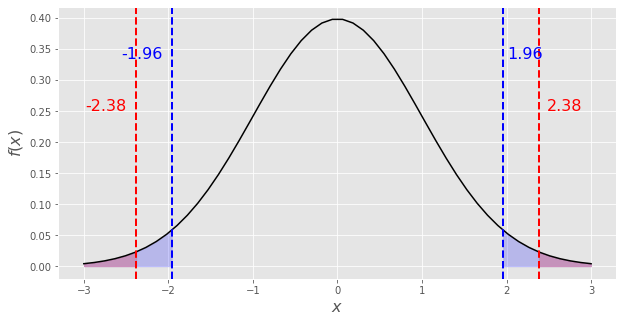

In [26]:
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='two-sided')

### Односторонняя гипотеза

$$
\begin{aligned}
&H_0: \hspace{2mm} p_x = p_y \hspace{2mm} \text{На бумаге и в реальности жмут на кнопку одинаково часто} \\
&H_1: \hspace{2mm} p_x > p_y  \hspace{2mm} \text{На бумаге на кнопку жмут чаще}
\end{aligned}
$$

В случае односторонней альтернативы ошибка 1 рода, $\alpha$, переносится на один из хвостов. 

0.008701077805778001

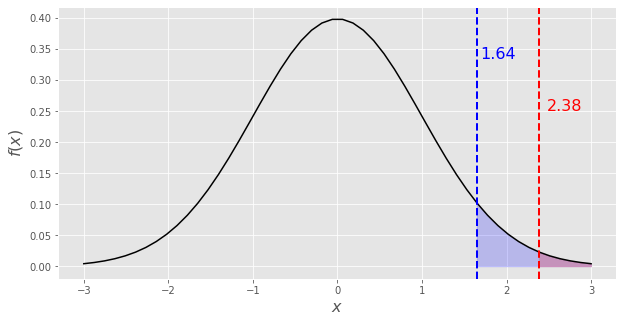

In [27]:
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger')

То же самое средствами `statsmodels`. 

In [28]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05                                       # уровень значимости = 5%
n_obs = paper.size, real.size                      # размеры выборок
m_obs = paper.sum(), real.sum()                    # число успехов

z_obs, p_val =  proportions_ztest(m_obs, n_obs, value=0, 
                                  alternative='larger')

print(f"Наблюдаемое значение: {z_obs:.3}") 
print(f"P-значение: {p_val:.3}") 

Наблюдаемое значение: 2.38
P-значение: 0.0087


> **Вывод:** гипотеза о том, что на кнопку жмут одинаково часто отвергается. На бумаге на кнопку жмут чаще.

## **Среднее** и кровожадность

Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные? 

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{Люди кровожадны} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{Люди не кровожадны}
\end{aligned}
$$

### Асимптотический тест 

Если предположить, что выборка достаточно велика и в ней нет выбросов, то можно воспользоваться ЦПТ и получить следующий критерий для тестирования гипотезы:
$$
z=\frac{\bar{x}-\mu_0}{\sqrt{\dfrac{\hat{\sigma}^2}{n}}}\sim N\left(0,\ 1\right)
$$


In [29]:
# Асимптотический критерий
x = df['RT'].dropna().values         # выборка

alpha = 0.05                         # уровень значимости = 5%
mu_0 = 5                             # тестируемое мат. ожидание выборки
n = x.size                           # размер выборки
mu = x.mean()                        # среднее значение
std = x.std(ddof=1)/np.sqrt(n)       # стандартное отклонение

z_obs = (mu - mu_0)/std                 # наблюдаемое значение статистики 
z_crit = stats.norm.ppf(1 - alpha)   # критическое значение статистики

print(f'Наблюдаемое значение {z_obs:.3} больше критического {z_crit:.3} => нулевая гипотеза отвергается')

Наблюдаемое значение 13.0 больше критического 1.64 => нулевая гипотеза отвергается


In [30]:
# Доверительный интервал
x.mean() - z_crit*std, x.mean() + z_crit*std
# 5 в доверительный интервал не попадает

(9.468100416884882, 10.76542499275367)

In [31]:
# 0.008 = p-value < alpha = 0.05
1-stats.norm.cdf(z_obs)

0.0

0.0

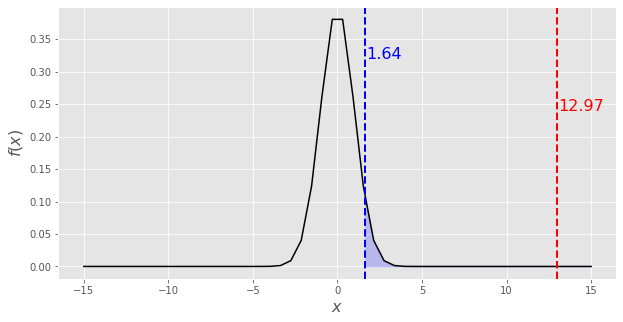

In [32]:
asy_mean_test(mu, std, mu_0=5, alpha=0.05, 
              margin=15, alternative='larger')

То же самое средствами `statsmodels`. 

In [33]:
from statsmodels.stats.weightstats import ztest

z_obs, p_val = ztest(x, value=5, alternative='larger')

print(f"Наблюдаемое значение: {z_obs:.7}") 
print(f"P-значение: {p_val:.3}") 

Наблюдаемое значение: 12.9749
P-значение: 8.49e-39


### Точный тест 

Если предположить, что выборка из нормального распределения, то можно воспользоваться теоремой Фишера и получить следующий критерий для тестирования гипотезы:
$$
t=\frac{\bar{x}-\mu}{\sqrt{\dfrac{\hat{\sigma}^2}{n}}}\sim t\left(n-1\right)
$$


In [34]:
t_obs = (mu - 5)/std                     # наблюдаемое значение статистики 
t_crit = stats.t(n - 1).ppf(1 - alpha)   # критическое значение статистики

print(f'Наблюдаемое значение {t_obs:.4} больше критического {t_crit:.4} => нулевая гипотеза отвергается')

Наблюдаемое значение 12.97 больше критического 1.654 => нулевая гипотеза отвергается


Каким тестом пользоваться? Точным или асимптотическим? 

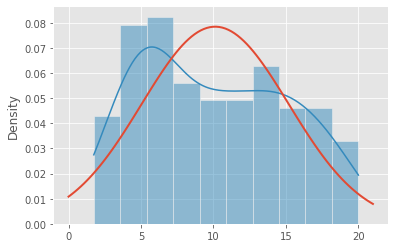

In [35]:
sns.histplot(x, bins=10, stat='density', kde=True)

xs = np.linspace(0,21,100)
pdf = stats.norm(x.mean(), x.std(ddof=1)).pdf(xs)
plt.plot(xs, pdf, lw=2);

Распределение не похоже на нормальное. Воспользуемся тестом Колмогорова-Смирнова и проверим гипотезу о нормальности распределения колонки `RT`.

In [36]:
stats.kstest(x, 'norm', args=(df['RT'].mean(), df['RT'].std(ddof=1)))

KstestResult(statistic=0.10581791163988818, pvalue=0.045074232278964566)

Видим, что `pvalue` очень низкое, это говорит о том, что гипотеза о нормальности выборки отвергается.

> **Вывод:** гипотеза о том, что люди кровожадные отвергается. Гипотезу тестируем с помощью асимптотического критерия, так как наблюдений много, а распределение отличается от нормального.

## Сравниваем кровожадность (**средние**)

Правда ли, что женщины намного кровожаднее мужчин и жмут на кнопку гораздо быстрее?

In [37]:
men = df[(df['GENDER'] == 1)]['RT'].dropna().values
women = df[(df['GENDER'] == 0)]['RT'].dropna().values

In [38]:
men.mean(), women.mean()

(9.373347263157894, 10.505521238532111)

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_x = \mu_y \hspace{2mm} \text{Cкорость нажатия на кнопку одинаковая} \\
&H_1: \hspace{2mm} \mu_x > \mu_y  \hspace{2mm} \text{Женщины жмут быстрее}
\end{aligned}
$$

Выше мы увидели, что в данных нет нормальности. Поэтому используем асимптотический тест. 

### Асимптотический тест 

Если предположить, что выборки достаточно велики, в них нет выбросов и они незавсимы, то можно воспользоваться ЦПТ, а также свойствами нормального распределения и получить следующий критерий для тестирования гипотезы:

$$
z=\dfrac{\bar{x}-\bar{y}}{\sqrt{\dfrac{\hat{\sigma}_{x}^{2}}{n_x}+\dfrac{\hat{\sigma}_{y}^{2}}{n_y}}} \sim N(0,1)
$$


In [39]:
alpha = 0.05                                                    # уровень значимости = 5%
nx, ny = women.size, men.size                                   # размер выборок

diff = women.mean() - men.mean()                                # разность средних
diff_std = np.sqrt(women.var(ddof=1)/nx + men.var(ddof=1)/ny)   # стандартное отклонение

z_obs = diff/diff_std                                           # наблюдаемое значение
z_crit = stats.norm.ppf(1 - alpha)                              # критическое значение

print(f'Наблюдаемое значение {z_obs:.5} меньше критического {z_crit:.3} => нулевая гипотеза не отвергается')

Наблюдаемое значение 1.376 меньше критического 1.64 => нулевая гипотеза не отвергается


0.08441634419903932

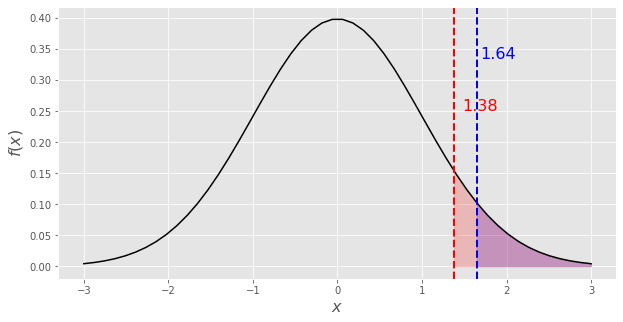

In [40]:
asy_mean_test(diff, diff_std, mu_0=0, alpha=0.05, alternative='larger')

Асимптотический тест для разных дисперсий в `statsmodels` не реализован. Есть только для равных.

> Приведём ниже код, который мы бы использовали, если бы с нормальностью выборки всё бы было хорошо. 

### Тест Стьюдента (неизвестные равные дисперсии) 

Если предположить, что выборки из нормального распределения, они независимы, и у них **одинаковая** дисперсия, то можно воспользоваться теоремой Фишера, а также свойствами нормального распределения и получить следующий критерий для тестирования гипотезы:

$$
t=\dfrac{\bar{x}-\bar{y} - \Delta}{\sqrt{\dfrac{\hat{s}^{2}}{n_x}+\dfrac{\hat{s}^{2}}{n_y}}} \sim t(n_x+n_y-2)
$$




где $\hat{s}^{2}$ - объединенная дисперсия:
$$
s^{2}=\frac{\left(n_{x}-1\right) \hat{s}_{x}^{2}+\left(n_{y}-1\right) \hat{s}_{y}^{2}}{n_{x}+n_{y}-2}
$$


In [41]:
alpha = 0.05                                                    # уровень значимости = 5%
nx, ny = women.size, men.size                                   # размер выборок
diff = women.mean() - men.mean()                                # разность средних

diff_var = ((nx - 1)*women.var(ddof=1) + (ny - 1)*men.var(ddof=1))/(nx + ny - 2)
diff_std = np.sqrt(diff_var/nx + diff_var/ny)                   # стандартное отклонение

t_obs = diff/diff_std                                           # наблюдаемое значение
t_crit = stats.t(df = nx + ny - 2).ppf(1 - alpha)               # критическое значение

print(f'Наблюдаемое значение {t_obs:.3} меньше критического {t_crit:.3} => нулевая гипотеза не отвергается')

Наблюдаемое значение 1.37 меньше критического 1.65 => нулевая гипотеза не отвергается


То же самое средствами `statsmodels`. 

In [42]:
from statsmodels.stats.weightstats import ttest_ind

t_obs, p_val, _ = ttest_ind(women, men, value=0, alternative='larger')

print(f"Наблюдаемое значение: {t_obs:.3}") 
print(f"P-значение: {p_val:.3}") 

Наблюдаемое значение: 1.37
P-значение: 0.0868


### Тест Уэлча (неизвестные разные дисперсии) 

Если предположить, что выборки из нормального распределения, они независимы, и у них **разная** дисперсия, то можно воспользоваться теоремой Фишера, а также свойствами нормального распределения и получить следующий критерий для тестирования гипотезы:

$$
t=\dfrac{\bar{x}-\bar{y}}{\sqrt{\dfrac{\hat{s}_{x}^{2}}{n_x}+\dfrac{\hat{s}_{y}^{2}}{n_y}}} \sim t(v)
$$


где $v$ – примерное число степеней свободы:

$$
v=\frac{\left(\dfrac{\hat{s}_{x}^{2}}{n_{x}}+\dfrac{\hat{s}_{y}^{2}}{n_{y}}\right)^{2}}{\dfrac{\hat{s}_{x}^{4}}{n_{x}^{2}\left(n_{x}-1\right)}+\dfrac{\hat{s}_{y}^{4}}{n_{y}^{2}\left(n_{y}-1\right)}}
$$


Этот тест называется тестом Уэлча и является примерном тестом.

In [43]:
alpha = 0.05                                                    # уровень значимости = 5%
nx, ny = women.size, men.size                                   # размер выборок

diff = women.mean() - men.mean()                                # разность средних
diff_std = np.sqrt(women.var(ddof=1)/nx + men.var(ddof=1)/ny)   # стандартное отклонение

t_obs = diff/diff_std                                           # наблюдаемое значение

# число степеней свободы
u = (women.var(ddof=1) / nx + men.var(ddof=1) / ny) ** 2
d = (women.var(ddof=1)**2) / (nx**2 * (nx - 1)) + (men.var(ddof=1)**2)/ (ny**2* (ny - 1))
nu =  u/d 

t_crit = stats.t(nu).ppf(1 - alpha)                             # критическое значение

print(f'Наблюдаемое значение {t_obs:.3} меньше критического {t_crit:.3} => нулевая гипотеза не отвергается')

Наблюдаемое значение 1.38 меньше критического 1.66 => нулевая гипотеза не отвергается


In [44]:
women.std(ddof=1), men.std(ddof=1)

(5.103972224167936, 4.996830829492463)

In [45]:
nx, ny # направление знака между наблюдениями соотвествует знаку между дисперсиями

(109, 57)

То же самое средствами `statsmodels`. 

In [46]:
from statsmodels.stats.weightstats import ttest_ind

# usevar опционально думает, что дисперсии одинаковые
t_obs, p_val, _ = ttest_ind(women, men, value=0, 
                            alternative='larger', usevar='unequal')

print(f"Наблюдаемое значение: {t_obs:.3}") 
print(f"P-значение: {p_val:.3}") 

Наблюдаемое значение: 1.38
P-значение: 0.0857


> **Вывод:** используем асимптотический критерий. Гипотеза о том, что женщины жмут на кнопку с такой же скоростью, как и мужчины не отвергается. Мужчины и женщины одинаково кровожадны.

## Эмпатия (сравниваем **дисперсии**)

Перед экспериментом каждый участник проходил психологический тест. Для каждого человека рассчитывалось довольно большое число параметров, описывающих его психотип. Например, в колонках `EC` находится оценка способности человека к эмпатии [(Empathic concern),](https://en.wikipedia.org/wiki/Empathic_concern) в колонке `AE` находится оценка эмпатии человека к животным. 



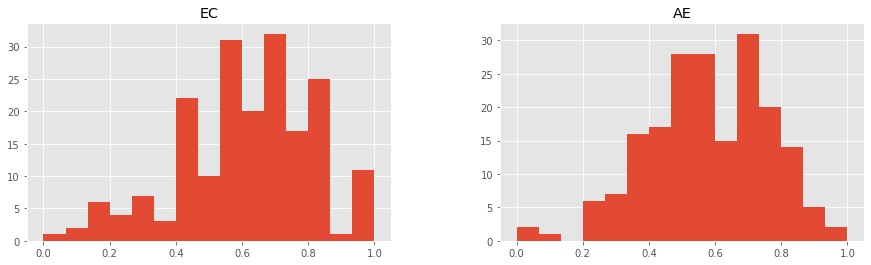

In [47]:
df['EC'] = (df['EC'] - df['EC'].min())/(df['EC'].max() - df['EC'].min())
df['AE'] = (df['AE'] - df['AE'].min())/(df['AE'].max() - df['AE'].min())

df[['EC', 'AE']].hist(bins=15, figsize=(15,4));

Правда ли, что неоднородность людей в плане их эмпатии к животным намного выше неоднородности в плане обычной эмпатии? 

$$
\begin{aligned}
&H_0: \hspace{2mm} \sigma^2_1 = \sigma^2_2 \hspace{2mm} \text{Неоднородность одинаковая} \\
&H_1: \hspace{2mm} \sigma^2_1 < \sigma^2_2  \hspace{2mm} \text{Неоднородность для животных выше}
\end{aligned}
$$

Распределения нормальные, можем использовать F-статистику. 

$$
F = \frac{\hat{\sigma}_{x}^{2}}{\hat{\sigma}_{y}^{2}}\sim F\left(n_{x}-1,\ n_{y}-1\right)
$$

In [48]:
ec = df['EC'].dropna().values
ae = df['AE'].dropna().values

ec.mean(), ae.mean()

(0.6190814394131477, 0.5798980496933709)

In [49]:
ec.var(), ae.var()

(0.04247637731538298, 0.032046916944347074)

In [50]:
alpha = 0.05                             # уровень значимости = 5%
nx, ny = ec.size, ae.size                # размер выборок

F_obs = ec.var()/ae.var()                # наблюдаемое значение

f_rv = stats.f(nx - 1, ny - 1) 
F_crit = f_rv.ppf(1 - alpha/2)           # критическое значение

print(f'Наблюдаемое значение {F_obs:.5} меньше критического {F_crit:.5} => нулевая гипотеза не отвергается')

Наблюдаемое значение 1.3254 меньше критического 1.3291 => нулевая гипотеза не отвергается


> Гипотеза о равенстве дисперсий не отвергается, однако она оказывается малозначима.

#  Зависимые выборки 

В случае, когда выборки зависимы, мы должны использовать для проверки гипотез критерии, которые это учитывают.

## Реклама (таблица сопряженности)

**Задача**

Фокус-группу из потенциальных покупателей спрашивают, купят ли они товар. После им показывают 30 секундный видео-ролик, в котором объясняется как этот товар поменяет их жизнь. Каждого из них снова спрашивают, купит ли он товар. Нужно проверить гипотезу о том, что ролик повлиял на мнение людей. 

В таблице ниже в столбик записаны результаты первого опроса, в строчку результаты второго. 

In [51]:
df = pd.DataFrame([[30, 15], [9,51]])
df.columns = ['yes', 'no']
df.index = ['yes', 'no']
df

,yes,no
yes,30,15
no,9,51


__Гипотеза:__ 

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{Ролик никак не повиял на готовность купить товар} \\
&H_1: \hspace{2mm} p_1 \ne p_2  \hspace{2mm} \text{Есть различия}
\end{aligned}
$$

__Критерий:__

$$
z = \frac{c - b}{\sqrt{c + b - \frac{(c-b)^2}{n}}}
$$

In [52]:
df2 = pd.DataFrame([['a', 'b'], ['c', 'd']])
df2.columns = ['yes', 'no']
df2.index = ['yes', 'no']
df2

,yes,no
yes,a,b
no,c,d


In [53]:
def proportions_diff_z_stat_rel(df):
    n = df.sum().sum()
    c = df.loc['no','yes']
    b = df.loc['yes','no']
    return (c - b) / np.sqrt(c + b - (c - b)**2 / n )

In [54]:
z_obs = proportions_diff_z_stat_rel(df)
z_obs

-1.2335879094879223

In [55]:
alpha = 0.05 
z_crit = stats.norm.ppf(alpha/2)   # критическое значение статистики

print(f'Наблюдаемое значение {z_obs:.3} больше критического {z_crit:.3} => нулевая гипотеза не отвергается')

Наблюдаемое значение -1.23 больше критического -1.96 => нулевая гипотеза не отвергается


## Контрольная работа (измерения на одних и тех же объектах)

В файле `cr.csv` лежат результаты контрольной работы. По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!  

__Описание колонок:__
* `k1` - результат за первую контрольную
* `k2` - результат за вторую контрольную
* `k3` - результат за третью контрольную

In [56]:
df = pd.read_csv('../data/cw.csv')
df = df.dropna()
df.head()

,k1,k2,k3
0,10.1,11.0,6.2
1,6.7,6.5,8.6
2,8.2,8.5,3.0
3,7.0,9.0,6.8
4,7.0,9.0,0.0


Правда ли, что в среднем их успеваемость не изменилась?

Рассмотрим изменение успеваемости между первой и второй контрольной

$$d_{i\ }=x_{i}-y_{i}$$

Дисперсию изменения оценим по формуле

$$
s^{2}=\frac{1}{n-1} \sum_{i=1}^{n}\left(d_{i}-\bar{d}\right)^{2}
$$

Для тестирования гипотезы об отсутствии изменения воспользуемся $t$-тестом

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1-\mu_2 = 0 \hspace{2mm} \text{оценка за КР не изменилась} \\
&H_1: \hspace{2mm}\mu_1-\mu_2  \ne 0 \hspace{2mm} \text{есть различия}
\end{aligned}
$$

Необходимый критерий:

$$
t\ =\ \dfrac{\bar{d}-0}{\sqrt{\dfrac{s^{2}}{n}}}\sim t\left(n-1\right)
$$

In [57]:
d = df['k2'] - df['k1']
d.size

388

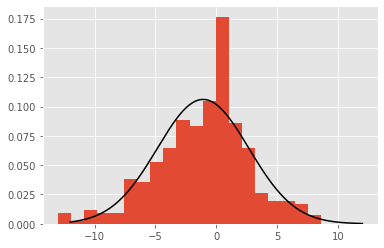

In [58]:
d_mean = d.mean()
d_std = d.std(ddof=1)

plt.hist(d, bins=20, density=True)

xs = np.linspace(-12, 12, 300)
ys = stats.norm(loc=d_mean, scale=d_std).pdf(xs)
plt.plot(xs, ys, color="black");

Распределение разности оценок похоже на нормальное. Можем использовать тест Стьюдента.

In [59]:
# статистика и p-value своими руками
t_obs = d.mean()/np.sqrt(d.var(ddof=1)/d.size)
p_val = 2*(1-stats.t.cdf(np.abs(t_obs), d.size-1))

t_obs, p_val

(-5.6790774747774755, 2.6632591687558715e-08)

In [60]:
# Тест для разностей
stats.ttest_1samp(d, 0)

Ttest_1sampResult(statistic=-5.6790774747774755, pvalue=2.6632591550359244e-08)

In [61]:
# тест для зависимых выборок 
x = df['k2']
y = df['k1']

stats.ttest_rel(x, y)

Ttest_relResult(statistic=-5.6790774747774755, pvalue=2.6632591550359244e-08)

Гипотеза о том, что успеваемость студентов не изменилась, отвергается. 

https://xkcd.com/1478/

<img src="https://imgs.xkcd.com/comics/p_values_2x.png" height="300" width="300"> 

# Корреляция Пирсона

Корреляционный анализ используется для анализа взаимосвязи двух непрерывных переменных. 

Коэффициент корреляции Пирсона характеризует тесноту и направленность **линейной** связи между двумя переменными и принимает значение от −1 до 1.

$$
r_{x, y}=\frac{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{\sqrt{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}} \sqrt{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}}
$$

Можно также встретить такие формулы:

1) Если применить оператор суммирования
$$
r_{x y}=\frac{\sum_{i} x_{i} y_{i}-n \bar{x} \bar{y}}{\sqrt{\sum_{i} x_{i}^{2}-n \bar{x}^{2}} \sqrt{\sum_{i} y_{i}^{2}-n \bar{y}^{2}}}
$$

2) Если рассмотреть стандартизоварованные оценки (Z-оценки)
$$
r_{x y}=\frac{1}{n-1} \sum_{i=1}^{n}\left(\frac{x_{i}-\bar{x}}{s_{x}}\right)\left(\frac{y_{i}-\bar{y}}{s_{y}}\right)
$$


In [62]:
# посмотрим еще раз на датасет с экспериментом о мышах
df = pd.read_csv("mouse.csv", sep="\t")
df.head()

,STUDY,AGE,GENDER,DECISION,DEO1,DEO2,DEO3,DEO4,DEO5,DEO6,...,AE,MOUSE1,MOUSE2,MOUSE3,MOUSE,DOUBT,OTHERCHOICE,UNCOMFORTABLE,NOSHOCK,RT
0,1,38,1,NaN,2,2,2,1,2,2,...,5.000000,6.0,5.0,5.0,5.333333,NaN,NaN,NaN,NaN,NaN
1,1,22,1,NaN,1,2,2,1,2,1,...,5.727273,5.0,6.0,6.0,5.666667,NaN,NaN,NaN,NaN,NaN
2,1,39,1,NaN,1,1,3,5,3,1,...,5.545455,6.0,6.0,6.0,6.000000,NaN,NaN,NaN,NaN,NaN
3,1,21,0,1.0,2,3,3,3,3,2,...,5.136364,4.0,7.0,7.0,6.000000,2.0,0.0,6.0,80.0,9.212427
4,1,20,0,1.0,4,2,2,2,2,2,...,4.181818,4.0,6.0,6.0,5.333333,4.0,0.0,6.5,75.0,17.071711


В нем достаточно много различных характеристик. Больше информации [тут](https://osf.io/3ufk9/)

**Описание переменных**

``STUDY: Study 1 (Real life Dilemma) or Study 2 (Hypothetical)
AGE: Age of the participants
GENDER: Gender of the participants (0 = Female, 1 = Male)
DECISION: Decision on the Mouse dilemma (0 = Deont., 1 = Cons.)
DEO1-10: Subjects ratings of appropriateness for the deontological option on dilemma 1 – 10
DEO: Average of DEO 1-10
CON1-10: Subjects ratings of appropriateness for the consequentialist option on dilemma 1 – 10
CON: Average of CON 1-10
NFC1-18: Subjects ratings on the Need for Cognition items
NFC: Subjects NFC score
EC1-7: Subjects ratings on the Empathic Concern items
EC: Subjects EC score
PT1-7: Subjects ratings on the Perspective Taking items
PT: Subjects PT score
PP1-16: Subjects ratings on the Primary Psychopathy items
PP: Subjects PP score
MID1-10: Subjects ratings on the Moral Identity items
I1-5: Subjects ratings on the Internalization subscale of Moral Identity
I: Subjects Internalization score
S1-5: Subjects ratings on the Symbolization subscale of Moral Idenity
S: Subjects Symbolization score
AE1-22: Subjects ratings on the Animal Empathy items
AE: Subjects Animal Empathy score
MOUSE1-3: Subjects ratings on the Empathy for Mice items
MOUSE: Subjects Empathy for Mice score
DOUBT: Subjects self-reported doubt for “Decision”
UNCOMFORTABLE: Subjects self-reported uncomfortableness with “Decision”
NOSHOCK: The extent to which subjects were certain no shocks would be given(self-reported)
RT: Subjects reaction time if they made a consequentialist decision
``

In [63]:
# Выделим некоторые ключевые переменные
cols = ['CON', 'DEO', 'NFC', 'EC', 'PT', 'PP', 'I', 'S', 'AE', 'MOUSE']
corr = df[cols].corr()

corr

,CON,DEO,NFC,EC,PT,PP,I,S,AE,MOUSE
CON,1.000000,-0.130800,0.227270,-0.139969,0.032274,0.239326,-0.126171,0.056511,-0.026570,-0.137355
DEO,-0.130800,1.000000,-0.041706,-0.115465,-0.079523,0.033845,0.039485,0.091804,-0.073920,-0.049242
NFC,0.227270,-0.041706,1.000000,0.055408,0.292804,-0.069836,0.097187,0.076282,0.089483,0.037231
EC,-0.139969,-0.115465,0.055408,1.000000,0.502733,-0.570740,0.523312,0.133641,0.413765,0.366515
PT,0.032274,-0.079523,0.292804,0.502733,1.000000,-0.334871,0.322932,0.039610,0.269056,0.214524
PP,0.239326,0.033845,-0.069836,-0.570740,-0.334871,1.000000,-0.473980,-0.083251,-0.398124,-0.310578
I,-0.126171,0.039485,0.097187,0.523312,0.322932,-0.473980,1.000000,0.172633,0.349256,0.278242
S,0.056511,0.091804,0.076282,0.133641,0.039610,-0.083251,0.172633,1.000000,0.111121,0.017396
AE,-0.026570,-0.073920,0.089483,0.413765,0.269056,-0.398124,0.349256,0.111121,1.000000,0.545950
MOUSE,-0.137355,-0.049242,0.037231,0.366515,0.214524,-0.310578,0.278242,0.017396,0.545950,1.000000


С помощью корреляционного анализа можно попробовать быстро обнаружить взаимосвязь между большим количеством переменных

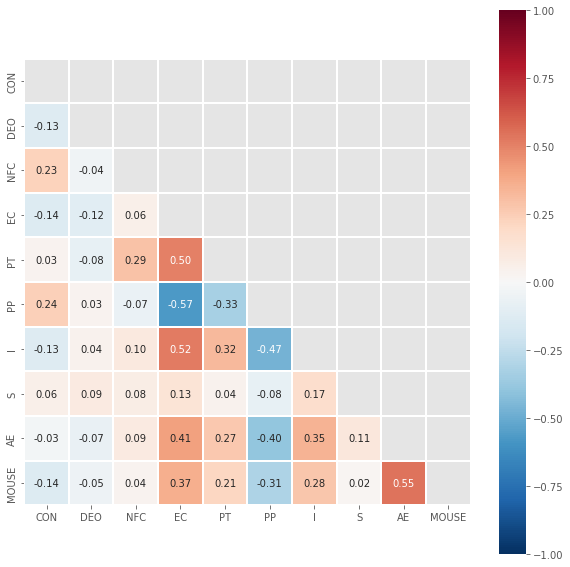

In [64]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=mask, square=True,
            annot=True, fmt=".2f", 
            linewidths=0.2, cmap="RdBu_r",
            vmin=-1, vmax=1, center=0
           );

## t-тест

Выделим пару переменных для более тщательного анализа. В колонках `EC` находится оценка способности человека к эмпатии, в колонке `AE` находится оценка эмпатии человека к животным. 

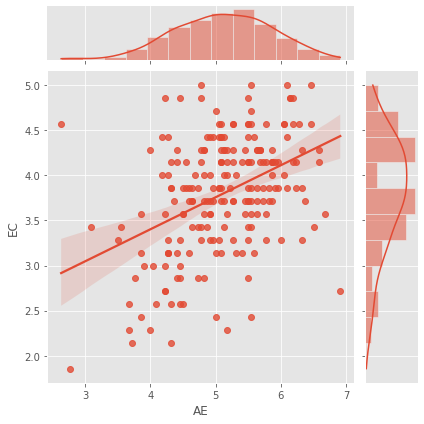

In [65]:
# (обсудить эти графики!)
# sns.scatterplot(data=df, x='AE', y='EC');
# sns.regplot(data=df, x='AE', y='EC');


sns.jointplot(data=df, x="AE", y="EC", kind='reg');

In [66]:
df[['AE','EC']].corr()

,AE,EC
AE,1.000000,0.413765
EC,0.413765,1.000000


Для коэффициента корреляции Пирсона можно протестировать гипотезу о равенству нулю этого коэффициента (то есть об отсутствии линейной взаимосвязи двух переменных)

$$
\begin{aligned}
&H_0: \hspace{2mm} r_{x, y} = 0 \hspace{2mm} \text{нет линейной взаимосвязи} \\
&H_1: \hspace{2mm} r_{x, y} \ne 0 \hspace{2mm} \text{есть}
\end{aligned}
$$

Для этого снова понадобится $t$-статистика

$$
t = r_{x, y} \sqrt{\frac{n-2}{1-r_{x, y}^{2}}} \sim t(n-2)
$$




In [67]:
sample = df[['AE','EC']].dropna()
n = sample.size
r = sample.corr().iloc[0,1]

t = r * np.sqrt((n-2)/(1-r**2))
pval = 2*(1-stats.t.cdf(np.abs(t), n-2))

r, t, pval # гипотезу об отсутствии линейной взаимосвязи отвергаем => взаимосвязь есть

(0.4137653731444694, 9.247618598521704, 0.0)

In [68]:
stats.pearsonr(sample['AE'], sample['EC'])

(0.4137653731444694, 5.228406803387317e-10)